In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from GLM.LinearRegression import LinearRegression
sns.set_style('ticks')

# mcfadden - pseudo R2 

In [2]:
metal_df = pd.read_csv("data//csvs//metal_cleaned.csv")
rap_df = pd.read_csv("data//csvs//rap_cleaned.csv")
classic_df = pd.read_csv("data//csvs//classic_cleaned.csv")
jazz_df = pd.read_csv("data//csvs//jazz_cleaned.csv")

In [3]:
feat = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms','tempo', 'time_signature']
metal_df['duration_ms'] = metal_df['duration_ms']/1000
rap_df['duration_ms'] = rap_df['duration_ms']/1000
classic_df['duration_ms'] = classic_df['duration_ms']/1000
jazz_df['duration_ms'] = jazz_df['duration_ms']/1000

The dataframes are already cleaned so we can go ahead and create some plots

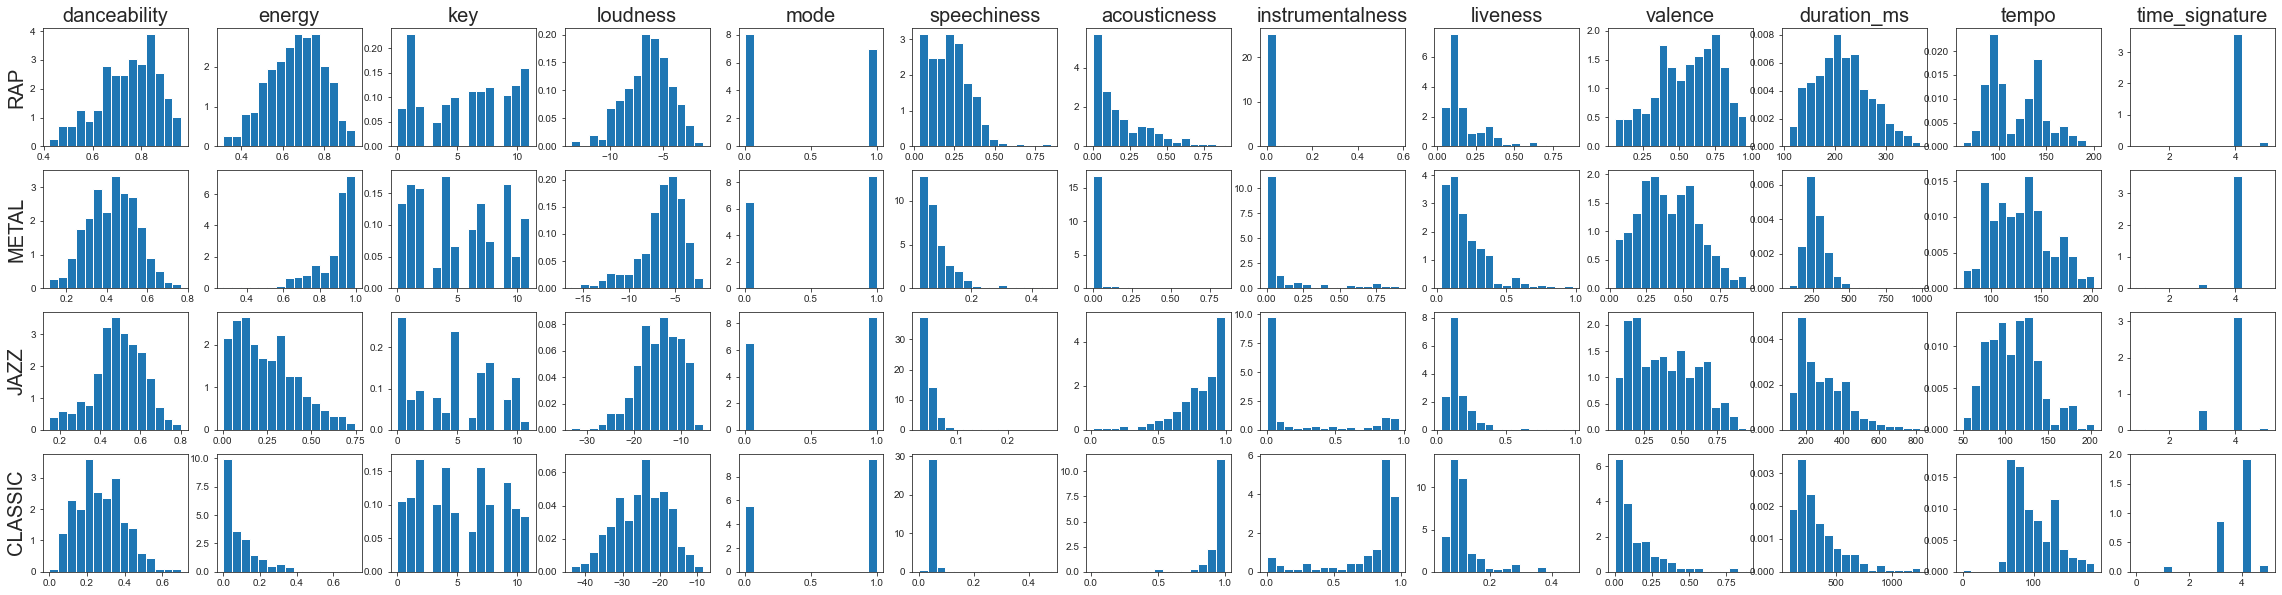

In [4]:
_, ax = plt.subplots(ncols=len(feat), nrows=4, figsize=(40,10)) 

for i in range(len(feat)) :
    if i == 0 :
        ax[0][i].set_ylabel("RAP", fontsize = 20)
        ax[1][i].set_ylabel("METAL", fontsize = 20)
        ax[2][i].set_ylabel("JAZZ", fontsize = 20)
        ax[3][i].set_ylabel("CLASSIC", fontsize = 20)
    ax[0][i].set_title(feat[i], fontsize=20)
    ax[0][i].hist(rap_df.loc[:, feat[i]], density = True, label = feat[i],bins=15)
    ax[1][i].hist(metal_df.loc[:, feat[i]], density = True, label = feat[i],bins=15)
    ax[2][i].hist(jazz_df.loc[:, feat[i]], density = True, label = feat[i],bins=15)
    ax[3][i].hist(classic_df.loc[:, feat[i]], density = True, label = feat[i],bins=15)


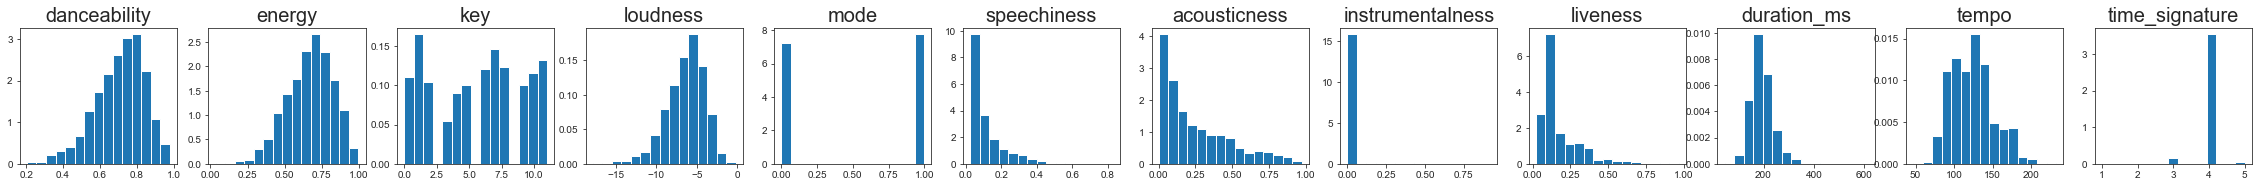

danceability          0.707183
energy                0.668940
key                   5.615260
loudness             -6.417846
mode                  0.516234
speechiness           0.112527
acousticness          0.249361
instrumentalness      0.012603
liveness              0.178032
valence               0.567758
tempo               123.342389
duration_ms         192.839226
time_signature        3.965097
popularity           68.702922
dtype: float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0.714,0.776,1.0,-7.644,1.0,0.105,0.133,0.0,0.108,0.587,94.990,216.0,4.0,73.0
1,NaN,NaN,NaN,-5.661,NaN,0.124,NaN,NaN,NaN,NaN,119.982,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.024,NaN,NaN,NaN


In [5]:
dF = pd.read_csv('data//csvs/Top50_clean.csv',index_col=0).drop(['id','uri','artist_followers'],axis=1)
dF['duration_ms'] = dF['duration_ms']/1000
feat = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'tempo', 'time_signature']
_, ax = plt.subplots(ncols=len(feat), nrows=1,figsize = (40,2.5)) 
for i in range(len(feat)):
    ax[i].set_title(feat[i], fontsize=20)
    ax[i].hist(dF.loc[:, feat[i]], density = True, label = feat[i], bins=15)
#plt.tight_layout()
plt.show()
print(dF.mean())
dF.mode()

In [20]:
LR = LinearRegression()
dF1 = pd.read_csv('data//csvs/Top50_clean.csv',index_col=0).drop(['id','uri'],axis=1)
dF2 = pd.read_csv('data\csvs\dataframeV2.csv',index_col=0).drop(['id','uri','label'],axis=1)
dF = pd.concat([dF1,dF2])
dFF = dF.copy()
X = dF.drop(['popularity'],axis=1)
Y = dF['popularity']
LR.fit(X,Y)
print(LR.R_squared)

0.1687518001671231


In [21]:
from RandomForest.randomForest import Forest
from sklearn.model_selection import train_test_split

dF['popularity'] = pd.cut(dF.popularity,bins=3,labels = ['low', 'medium', 'high'])
dF.popularity = pd.Categorical(dF.popularity)
dF['Y'] = dF.popularity.cat.codes
X = dF.drop(['Y','popularity'],axis=1)
y = dF.Y
x_train, x_test, y_train, y_test = train_test_split(X, y,  train_size=.78)
f = Forest(32, max_depth=5) 
f.fit(x_train, y_train)
p = f.predict(x_test.to_numpy())
print(sum(p == y_test) / len(y_test))


0.6805555555555556


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dF = dFF
dF['popularity'] = pd.cut(dF.popularity,bins=3)
y = dF[['popularity']].to_numpy().ravel()
x = dF.drop(['popularity'],axis=1)

ly = LabelEncoder()
y = ly.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22)


logreg = LogisticRegression(solver = 'newton-cg',multi_class='auto',max_iter=100000,n_jobs=-1)
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

acc1 = accuracy_score(y_test,y_pred)
print(acc1)

0.6197916666666666
